# Double check input emissions

Make sure that MAGICC and FaIR ran with the same input emissions.

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import os.path

import matplotlib.pyplot as plt
import scmdata.testing
import scmdata.database
import tqdm.autonotebook as tqdman

import utils

<IPython.core.display.Javascript object>

/data/ubuntu-znicholls/miniconda3/envs/nicholls-et-al-2022-emulator-changes/lib/python3.7/site-packages/scmdata/database.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


<IPython.core.display.Javascript object>

In [3]:
plt.rcParams["figure.figsize"] = (12, 8)

<IPython.core.display.Javascript object>

In [4]:
ar6_output_db = scmdata.database.ScmDatabase(
    os.path.join(
        utils.DATA_DIR,
        "processed",
        "ar6-output",
        "MAGICC",
        utils.AR6_OUTPUT_SR15_RAW_ID,
    ),
    levels=("variable", "percentile"),
)

<IPython.core.display.Javascript object>

In [5]:
ar6_output_db_fair = scmdata.database.ScmDatabase(
    os.path.join(utils.DATA_DIR, "processed", "ar6-output", "fair", "sr15-processing"),
    levels=("variable", "percentile"),
)

<IPython.core.display.Javascript object>

In [6]:
ar6_output_db.available_data()

variable percentile
0    Atmospheric-Concentrations-CH4       10.0
1    Atmospheric-Concentrations-CH4       16.7
2    Atmospheric-Concentrations-CH4       33.0
3    Atmospheric-Concentrations-CH4        5.0
4    Atmospheric-Concentrations-CH4       50.0
..                              ...        ...
466      Surface-Temperature--GSAT-       50.0
467      Surface-Temperature--GSAT-       67.0
468      Surface-Temperature--GSAT-       83.3
469      Surface-Temperature--GSAT-       90.0
470      Surface-Temperature--GSAT-       95.0

[471 rows x 2 columns]

<IPython.core.display.Javascript object>

In [7]:
emissions = utils.load_with_mod_scen(ar6_output_db, variable="*Emissions*")
emissions["climate_model"] = utils.MAGICC_VERSION
emissions

Loading files:   0%|          | 0/107 [00:00<?, ?it/s]

<scmdata.ScmRun (timeseries: 43977, timepoints: 102)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2105-01-01T00:00:00
Meta:
	      climate_model methodology                model  \
	0      MAGICCv7.5.3       SR1.5              AIM_2_0   
	1      MAGICCv7.5.3       SR1.5          IMAGE_3_0_1   
	2      MAGICCv7.5.3       SR1.5  MESSAGE-GLOBIOM_1_0   
	3      MAGICCv7.5.3       SR1.5        POLES_ADVANCE   
	4      MAGICCv7.5.3       SR1.5           REMIND_1_7   
	...             ...         ...                  ...   
	43972  MAGICCv7.5.3       SR1.5              AIM_2_1   
	43973  MAGICCv7.5.3       SR1.5              AIM_2_1   
	43974  MAGICCv7.5.3       SR1.5              AIM_2_1   
	43975  MAGICCv7.5.3       SR1.5              AIM_2_1   
	43976  MAGICCv7.5.3       SR1.5              AIM_2_1   
	
	                                          model_scenario      percentile  \
	0                         AIM_2_0-ADVANCE_2020_1.5C-2100  not_applicable   
	1                     IMAGE_3_0_1-ADVAN

<IPython.core.display.Javascript object>

In [8]:
ar6_output_db_fair.available_data()

variable percentile
0    Atmospheric-Concentrations-CH4       10.0
1    Atmospheric-Concentrations-CH4       16.7
2    Atmospheric-Concentrations-CH4       33.0
3    Atmospheric-Concentrations-CH4        5.0
4    Atmospheric-Concentrations-CH4       50.0
..                              ...        ...
439      Surface-Temperature--GSAT-       50.0
440      Surface-Temperature--GSAT-       67.0
441      Surface-Temperature--GSAT-       83.3
442      Surface-Temperature--GSAT-       90.0
443      Surface-Temperature--GSAT-       95.0

[444 rows x 2 columns]

<IPython.core.display.Javascript object>

In [9]:
emissions_fair = utils.load_with_mod_scen(ar6_output_db_fair, variable="*Emissions*")
emissions_fair["climate_model"] = "FaIRv1.6.2"
emissions_fair

Loading files:   0%|          | 0/107 [00:00<?, ?it/s]

<scmdata.ScmRun (timeseries: 43977, timepoints: 102)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2105-01-01T00:00:00
Meta:
	      climate_model methodology                model  \
	0        FaIRv1.6.2       SR1.5              AIM_2_0   
	1        FaIRv1.6.2       SR1.5          IMAGE_3_0_1   
	2        FaIRv1.6.2       SR1.5  MESSAGE-GLOBIOM_1_0   
	3        FaIRv1.6.2       SR1.5        POLES_ADVANCE   
	4        FaIRv1.6.2       SR1.5           REMIND_1_7   
	...             ...         ...                  ...   
	43972    FaIRv1.6.2       SR1.5              AIM_2_1   
	43973    FaIRv1.6.2       SR1.5              AIM_2_1   
	43974    FaIRv1.6.2       SR1.5              AIM_2_1   
	43975    FaIRv1.6.2       SR1.5              AIM_2_1   
	43976    FaIRv1.6.2       SR1.5              AIM_2_1   
	
	                                          model_scenario      percentile  \
	0                         AIM_2_0-ADVANCE_2020_1.5C-2100  not_applicable   
	1                     IMAGE_3_0_1-ADVAN

<IPython.core.display.Javascript object>

  0%|          | 0/54 [00:00<?, ?it/s]

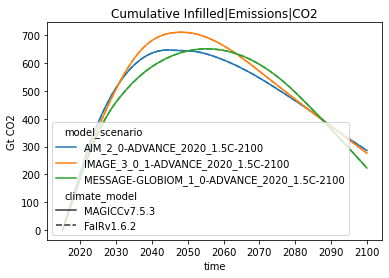

time                                                                                                                                                                            2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit   variable                                        
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Gt CO2 Cumulative Infilled|Emissions|CO2         NaN   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Gt CO2 Cumulative Infilled|Emissions|CO2         NaN   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Gt CO2 Cumulative Infilled|Emissions|CO2         NaN   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Gt CO2 Cumulative Infilled|Emissions|CO2         NaN   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Gt CO2 Cumulative Infilled|Emissions|CO2         NaN   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Gt CO2 Cumulative Infilled|Emissions|CO2         NaN   

time                                                                                                                                                                            2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit   variable                                        
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Gt CO2 Cumulative Infilled|Emissions|CO2         NaN   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Gt CO2 Cumulative Infilled|Emissions|CO2         NaN   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Gt CO2 Cumulative Infilled|Emissions|CO2         NaN   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Gt CO2 Cumulative Infilled|Emissions|CO2         NaN   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Gt CO2 Cumulative Infilled|Emissions|CO2         NaN   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Gt CO2 Cumulative Infilled|Emissions|CO2         NaN   

time                                                                                                                                                                            2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit   variable                                        
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Gt CO2 Cumulative Infilled|Emissions|CO2         NaN   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Gt CO2 Cumulative Infilled|Emissions|CO2         NaN   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Gt CO2 Cumulative Infilled|Emissions|CO2         NaN   
MAGICCv7

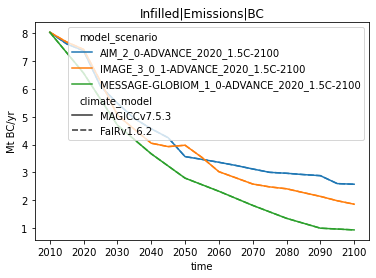

time                                                                                                                                                                  2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit     variable                            
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt BC/yr Infilled|Emissions|BC      8.0345   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt BC/yr Infilled|Emissions|BC      8.0345   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt BC/yr Infilled|Emissions|BC      8.0345   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt BC/yr Infilled|Emissions|BC      8.0345   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt BC/yr Infilled|Emissions|BC      8.0345   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt BC/yr Infilled|Emissions|BC      8.0345   

time                                                                                                                                                                  2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit     variable                            
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt BC/yr Infilled|Emissions|BC     7.95098   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt BC/yr Infilled|Emissions|BC     7.96424   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt BC/yr Infilled|Emissions|BC     7.88757   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt BC/yr Infilled|Emissions|BC     7.95098   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt BC/yr Infilled|Emissions|BC     7.96424   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt BC/yr Infilled|Emissions|BC     7.88757   

time                                                                                                                                                                  2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit     variable                            
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt BC/yr Infilled|Emissions|BC     7.86746   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt BC/yr Infilled|Emissions|BC     7.89398   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt BC/yr Infilled|Emissions|BC     7.74064   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt BC/yr Infilled|Emissions|BC     7.86746   
                          IMAGE_3_0_1 

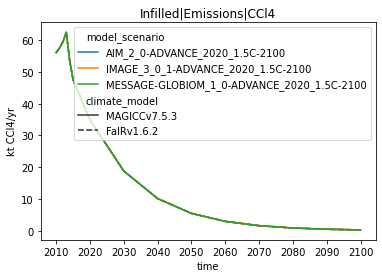

time                                                                                                                                                                      2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit       variable                              
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CCl4/yr Infilled|Emissions|CCl4   56.090865   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CCl4/yr Infilled|Emissions|CCl4   56.090865   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CCl4/yr Infilled|Emissions|CCl4   56.090865   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CCl4/yr Infilled|Emissions|CCl4   56.090865   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CCl4/yr Infilled|Emissions|CCl4   56.090865   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CCl4/yr Infilled|Emissions|CCl4   56.090865   

time                                                                                                                                                                      2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit       variable                              
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CCl4/yr Infilled|Emissions|CCl4   57.565927   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CCl4/yr Infilled|Emissions|CCl4   57.565927   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CCl4/yr Infilled|Emissions|CCl4   57.565927   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CCl4/yr Infilled|Emissions|CCl4   57.565927   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CCl4/yr Infilled|Emissions|CCl4   57.565927   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CCl4/yr Infilled|Emissions|CCl4   57.565927   

time                                                                                                                                                                      2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit       variable                              
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CCl4/yr Infilled|Emissions|CCl4   59.464919   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CCl4/yr Infilled|Emissions|CCl4   59.464919   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CCl4/yr Infilled|Emissions|CCl4   59.464919   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 

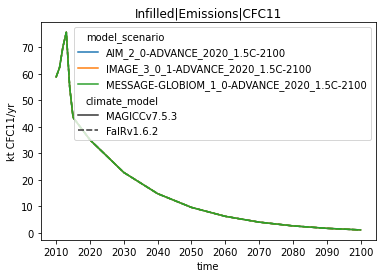

time                                                                                                                                                                        2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                               
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC11/yr Infilled|Emissions|CFC11    58.86009   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC11/yr Infilled|Emissions|CFC11    58.86009   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC11/yr Infilled|Emissions|CFC11    58.86009   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC11/yr Infilled|Emissions|CFC11    58.86009   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC11/yr Infilled|Emissions|CFC11    58.86009   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC11/yr Infilled|Emissions|CFC11    58.86009   

time                                                                                                                                                                        2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                               
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC11/yr Infilled|Emissions|CFC11   62.415615   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC11/yr Infilled|Emissions|CFC11   62.415615   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC11/yr Infilled|Emissions|CFC11   62.415615   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC11/yr Infilled|Emissions|CFC11   62.415615   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC11/yr Infilled|Emissions|CFC11   62.415615   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC11/yr Infilled|Emissions|CFC11   62.415615   

time                                                                                                                                                                        2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                               
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC11/yr Infilled|Emissions|CFC11   70.235225   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC11/yr Infilled|Emissions|CFC11   70.235225   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC11/yr Infilled|Emissions|CFC11   70.235225   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not

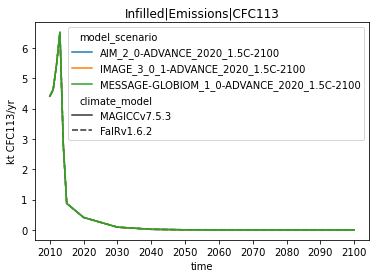

time                                                                                                                                                                          2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit         variable                                
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC113/yr Infilled|Emissions|CFC113    4.407032   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC113/yr Infilled|Emissions|CFC113    4.407032   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC113/yr Infilled|Emissions|CFC113    4.407032   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC113/yr Infilled|Emissions|CFC113    4.407032   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC113/yr Infilled|Emissions|CFC113    4.407032   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC113/yr Infilled|Emissions|CFC113    4.407032   

time                                                                                                                                                                          2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit         variable                                
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC113/yr Infilled|Emissions|CFC113    4.623794   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC113/yr Infilled|Emissions|CFC113    4.623794   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC113/yr Infilled|Emissions|CFC113    4.623794   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC113/yr Infilled|Emissions|CFC113    4.623794   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC113/yr Infilled|Emissions|CFC113    4.623794   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC113/yr Infilled|Emissions|CFC113    4.623794   

time                                                                                                                                                                          2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit         variable                                
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC113/yr Infilled|Emissions|CFC113    5.452927   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC113/yr Infilled|Emissions|CFC113    5.452927   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC113/yr Infilled|Emissions|CFC113    5.452927   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_

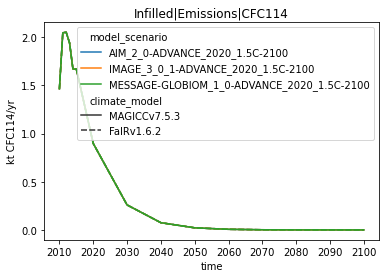

time                                                                                                                                                                          2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit         variable                                
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC114/yr Infilled|Emissions|CFC114    1.464415   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC114/yr Infilled|Emissions|CFC114    1.464415   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC114/yr Infilled|Emissions|CFC114    1.464415   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC114/yr Infilled|Emissions|CFC114    1.464415   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC114/yr Infilled|Emissions|CFC114    1.464415   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC114/yr Infilled|Emissions|CFC114    1.464415   

time                                                                                                                                                                          2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit         variable                                
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC114/yr Infilled|Emissions|CFC114    2.046829   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC114/yr Infilled|Emissions|CFC114    2.046829   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC114/yr Infilled|Emissions|CFC114    2.046829   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC114/yr Infilled|Emissions|CFC114    2.046829   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC114/yr Infilled|Emissions|CFC114    2.046829   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC114/yr Infilled|Emissions|CFC114    2.046829   

time                                                                                                                                                                          2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit         variable                                
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC114/yr Infilled|Emissions|CFC114    2.052052   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC114/yr Infilled|Emissions|CFC114    2.052052   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC114/yr Infilled|Emissions|CFC114    2.052052   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_

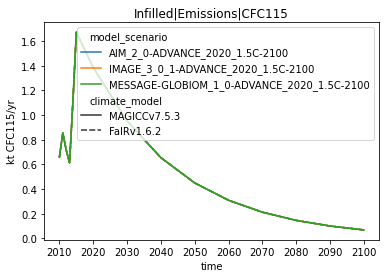

time                                                                                                                                                                          2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit         variable                                
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC115/yr Infilled|Emissions|CFC115    0.658964   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC115/yr Infilled|Emissions|CFC115    0.658964   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC115/yr Infilled|Emissions|CFC115    0.658964   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC115/yr Infilled|Emissions|CFC115    0.658964   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC115/yr Infilled|Emissions|CFC115    0.658964   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC115/yr Infilled|Emissions|CFC115    0.658964   

time                                                                                                                                                                          2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit         variable                                
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC115/yr Infilled|Emissions|CFC115    0.856017   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC115/yr Infilled|Emissions|CFC115    0.856017   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC115/yr Infilled|Emissions|CFC115    0.856017   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC115/yr Infilled|Emissions|CFC115    0.856017   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC115/yr Infilled|Emissions|CFC115    0.856017   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC115/yr Infilled|Emissions|CFC115    0.856017   

time                                                                                                                                                                          2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit         variable                                
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC115/yr Infilled|Emissions|CFC115    0.716861   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC115/yr Infilled|Emissions|CFC115    0.716861   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC115/yr Infilled|Emissions|CFC115    0.716861   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_

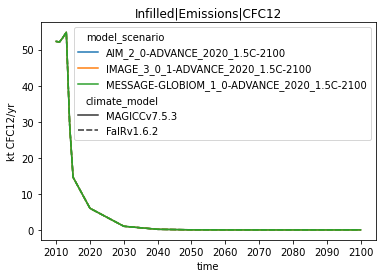

time                                                                                                                                                                        2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                               
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC12/yr Infilled|Emissions|CFC12   52.271203   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC12/yr Infilled|Emissions|CFC12   52.271203   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC12/yr Infilled|Emissions|CFC12   52.271203   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC12/yr Infilled|Emissions|CFC12   52.271203   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC12/yr Infilled|Emissions|CFC12   52.271203   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC12/yr Infilled|Emissions|CFC12   52.271203   

time                                                                                                                                                                        2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                               
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC12/yr Infilled|Emissions|CFC12   52.120722   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC12/yr Infilled|Emissions|CFC12   52.120722   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC12/yr Infilled|Emissions|CFC12   52.120722   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC12/yr Infilled|Emissions|CFC12   52.120722   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC12/yr Infilled|Emissions|CFC12   52.120722   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC12/yr Infilled|Emissions|CFC12   52.120722   

time                                                                                                                                                                        2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                               
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC12/yr Infilled|Emissions|CFC12    53.35878   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC12/yr Infilled|Emissions|CFC12    53.35878   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CFC12/yr Infilled|Emissions|CFC12    53.35878   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not

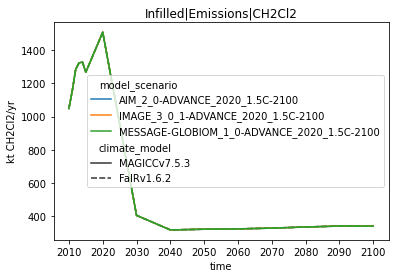

time                                                                                                                                                                          2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit         variable                                
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CH2Cl2/yr Infilled|Emissions|CH2Cl2   1048.8592   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CH2Cl2/yr Infilled|Emissions|CH2Cl2   1048.8592   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CH2Cl2/yr Infilled|Emissions|CH2Cl2   1048.8592   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CH2Cl2/yr Infilled|Emissions|CH2Cl2   1048.8592   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CH2Cl2/yr Infilled|Emissions|CH2Cl2   1048.8592   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CH2Cl2/yr Infilled|Emissions|CH2Cl2   1048.8592   

time                                                                                                                                                                          2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit         variable                                
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CH2Cl2/yr Infilled|Emissions|CH2Cl2   1156.8684   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CH2Cl2/yr Infilled|Emissions|CH2Cl2   1156.8684   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CH2Cl2/yr Infilled|Emissions|CH2Cl2   1156.8684   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CH2Cl2/yr Infilled|Emissions|CH2Cl2   1156.8684   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CH2Cl2/yr Infilled|Emissions|CH2Cl2   1156.8684   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CH2Cl2/yr Infilled|Emissions|CH2Cl2   1156.8684   

time                                                                                                                                                                          2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit         variable                                
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CH2Cl2/yr Infilled|Emissions|CH2Cl2   1284.9937   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CH2Cl2/yr Infilled|Emissions|CH2Cl2   1284.9937   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CH2Cl2/yr Infilled|Emissions|CH2Cl2   1284.9937   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_

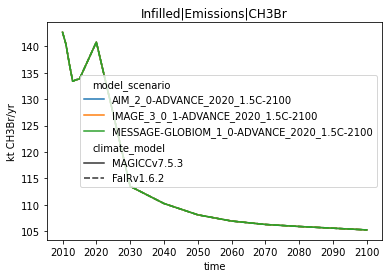

time                                                                                                                                                                        2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                               
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3Br/yr Infilled|Emissions|CH3Br    142.6745   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3Br/yr Infilled|Emissions|CH3Br    142.6745   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3Br/yr Infilled|Emissions|CH3Br    142.6745   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3Br/yr Infilled|Emissions|CH3Br    142.6745   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3Br/yr Infilled|Emissions|CH3Br    142.6745   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3Br/yr Infilled|Emissions|CH3Br    142.6745   

time                                                                                                                                                                        2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                               
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3Br/yr Infilled|Emissions|CH3Br   140.42156   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3Br/yr Infilled|Emissions|CH3Br   140.42156   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3Br/yr Infilled|Emissions|CH3Br   140.42156   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3Br/yr Infilled|Emissions|CH3Br   140.42156   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3Br/yr Infilled|Emissions|CH3Br   140.42156   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3Br/yr Infilled|Emissions|CH3Br   140.42156   

time                                                                                                                                                                        2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                               
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3Br/yr Infilled|Emissions|CH3Br   136.71475   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3Br/yr Infilled|Emissions|CH3Br   136.71475   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3Br/yr Infilled|Emissions|CH3Br   136.71475   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not

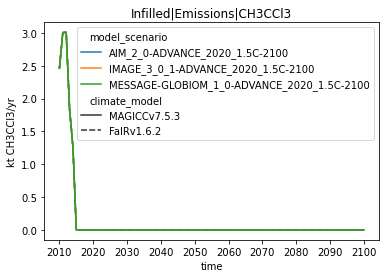

time                                                                                                                                                                            2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit          variable                                 
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3CCl3/yr Infilled|Emissions|CH3CCl3    2.461478   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3CCl3/yr Infilled|Emissions|CH3CCl3    2.461478   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3CCl3/yr Infilled|Emissions|CH3CCl3    2.461478   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3CCl3/yr Infilled|Emissions|CH3CCl3    2.461478   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3CCl3/yr Infilled|Emissions|CH3CCl3    2.461478   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3CCl3/yr Infilled|Emissions|CH3CCl3    2.461478   

time                                                                                                                                                                            2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit          variable                                 
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3CCl3/yr Infilled|Emissions|CH3CCl3    3.003616   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3CCl3/yr Infilled|Emissions|CH3CCl3    3.003616   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3CCl3/yr Infilled|Emissions|CH3CCl3    3.003616   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3CCl3/yr Infilled|Emissions|CH3CCl3    3.003616   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3CCl3/yr Infilled|Emissions|CH3CCl3    3.003616   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3CCl3/yr Infilled|Emissions|CH3CCl3    3.003616   

time                                                                                                                                                                            2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit          variable                                 
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3CCl3/yr Infilled|Emissions|CH3CCl3    3.009667   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3CCl3/yr Infilled|Emissions|CH3CCl3    3.009667   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3CCl3/yr Infilled|Emissions|CH3CCl3    3.009667   
MAGICCv7

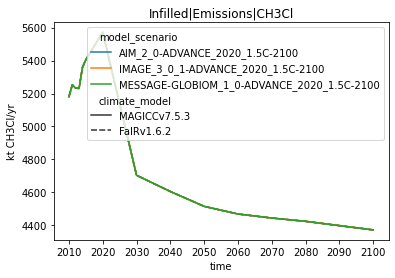

time                                                                                                                                                                        2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                               
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3Cl/yr Infilled|Emissions|CH3Cl   5179.9719   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3Cl/yr Infilled|Emissions|CH3Cl   5179.9719   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3Cl/yr Infilled|Emissions|CH3Cl   5179.9719   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3Cl/yr Infilled|Emissions|CH3Cl   5179.9719   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3Cl/yr Infilled|Emissions|CH3Cl   5179.9719   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3Cl/yr Infilled|Emissions|CH3Cl   5179.9719   

time                                                                                                                                                                        2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                               
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3Cl/yr Infilled|Emissions|CH3Cl   5252.9333   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3Cl/yr Infilled|Emissions|CH3Cl   5252.9333   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3Cl/yr Infilled|Emissions|CH3Cl   5252.9333   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3Cl/yr Infilled|Emissions|CH3Cl   5252.9333   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3Cl/yr Infilled|Emissions|CH3Cl   5252.9333   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3Cl/yr Infilled|Emissions|CH3Cl   5252.9333   

time                                                                                                                                                                        2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                               
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3Cl/yr Infilled|Emissions|CH3Cl   5232.3317   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3Cl/yr Infilled|Emissions|CH3Cl   5232.3317   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CH3Cl/yr Infilled|Emissions|CH3Cl   5232.3317   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not

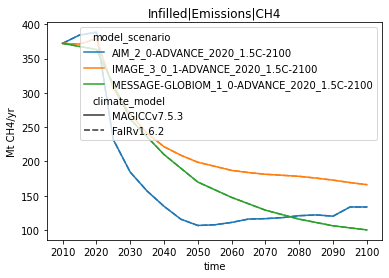

time                                                                                                                                                                    2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit      variable                             
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt CH4/yr Infilled|Emissions|CH4    372.1805   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt CH4/yr Infilled|Emissions|CH4    372.1805   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt CH4/yr Infilled|Emissions|CH4    372.1805   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt CH4/yr Infilled|Emissions|CH4    372.1805   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt CH4/yr Infilled|Emissions|CH4    372.1805   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt CH4/yr Infilled|Emissions|CH4    372.1805   

time                                                                                                                                                                    2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit      variable                             
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt CH4/yr Infilled|Emissions|CH4   374.60222   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt CH4/yr Infilled|Emissions|CH4   371.97682   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt CH4/yr Infilled|Emissions|CH4   371.28817   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt CH4/yr Infilled|Emissions|CH4   374.60222   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt CH4/yr Infilled|Emissions|CH4   371.97682   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt CH4/yr Infilled|Emissions|CH4   371.28817   

time                                                                                                                                                                    2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit      variable                             
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt CH4/yr Infilled|Emissions|CH4   377.02394   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt CH4/yr Infilled|Emissions|CH4   371.77314   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt CH4/yr Infilled|Emissions|CH4   370.39584   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt CH4/yr Infilled|Emissions|CH4   377.023

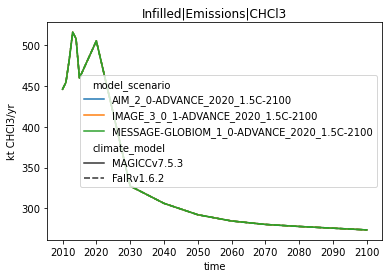

time                                                                                                                                                                        2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                               
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CHCl3/yr Infilled|Emissions|CHCl3   445.96535   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CHCl3/yr Infilled|Emissions|CHCl3   445.96535   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CHCl3/yr Infilled|Emissions|CHCl3   445.96535   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CHCl3/yr Infilled|Emissions|CHCl3   445.96535   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CHCl3/yr Infilled|Emissions|CHCl3   445.96535   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CHCl3/yr Infilled|Emissions|CHCl3   445.96535   

time                                                                                                                                                                        2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                               
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CHCl3/yr Infilled|Emissions|CHCl3   454.40753   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CHCl3/yr Infilled|Emissions|CHCl3   454.40753   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CHCl3/yr Infilled|Emissions|CHCl3   454.40753   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CHCl3/yr Infilled|Emissions|CHCl3   454.40753   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CHCl3/yr Infilled|Emissions|CHCl3   454.40753   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CHCl3/yr Infilled|Emissions|CHCl3   454.40753   

time                                                                                                                                                                        2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                               
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CHCl3/yr Infilled|Emissions|CHCl3   482.64499   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CHCl3/yr Infilled|Emissions|CHCl3   482.64499   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CHCl3/yr Infilled|Emissions|CHCl3   482.64499   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not

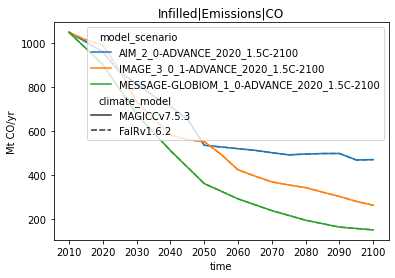

time                                                                                                                                                                  2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit     variable                            
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO/yr Infilled|Emissions|CO   1048.8921   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO/yr Infilled|Emissions|CO   1048.8921   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO/yr Infilled|Emissions|CO   1048.8921   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO/yr Infilled|Emissions|CO   1048.8921   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO/yr Infilled|Emissions|CO   1048.8921   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO/yr Infilled|Emissions|CO   1048.8921   

time                                                                                                                                                                  2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit     variable                            
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO/yr Infilled|Emissions|CO  1040.19944   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO/yr Infilled|Emissions|CO  1041.89146   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO/yr Infilled|Emissions|CO  1034.35550   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO/yr Infilled|Emissions|CO  1040.19944   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO/yr Infilled|Emissions|CO  1041.89146   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO/yr Infilled|Emissions|CO  1034.35550   

time                                                                                                                                                                  2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit     variable                            
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO/yr Infilled|Emissions|CO  1031.50678   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO/yr Infilled|Emissions|CO  1034.89082   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO/yr Infilled|Emissions|CO  1019.81890   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO/yr Infilled|Emissions|CO  1031.50678   
                          IMAGE_3_0_1 

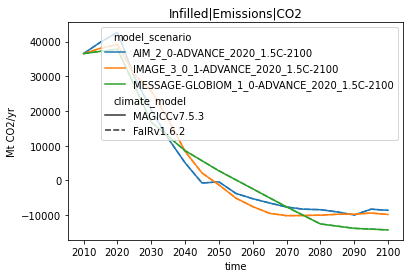

time                                                                                                                                                                      2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit      variable                               
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2  36554.466667   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2  36554.466667   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2  36554.466667   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2  36554.466667   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2  36554.466667   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2  36554.466667   

time                                                                                                                                                                      2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit      variable                               
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2  37217.473333   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2  36860.266667   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2  36684.266667   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2  37217.473333   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2  36860.266667   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2  36684.266667   

time                                                                                                                                                                      2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit      variable                               
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2  37880.480000   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2  37166.066667   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2  36814.066667   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 

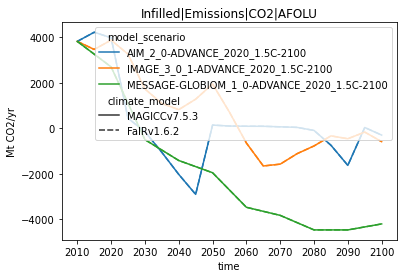

time                                                                                                                                                                           2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit      variable                                    
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2|AFOLU  3827.266667   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2|AFOLU  3827.266667   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2|AFOLU  3827.266667   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2|AFOLU  3827.266667   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2|AFOLU  3827.266667   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2|AFOLU  3827.266667   

time                                                                                                                                                                          2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit      variable                                   
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2|AFOLU     3907.86   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2|AFOLU     3756.28   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2|AFOLU     3714.81   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2|AFOLU     3907.86   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2|AFOLU     3756.28   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2|AFOLU     3714.81   

time                                                                                                                                                                           2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit      variable                                    
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2|AFOLU  3988.453333   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2|AFOLU  3685.293333   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2|AFOLU  3602.353333   
MAGICCv7.5.3  SR1.5       AIM_2_0    

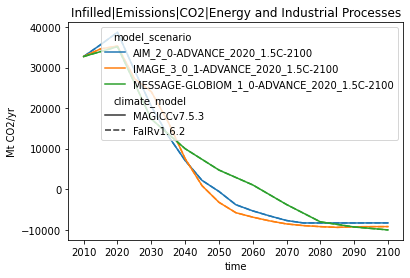

time                                                                                                                                                                                                2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit      variable                                                         
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2|Energy and Industrial Pr...     32727.2   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2|Energy and Industrial Pr...     32727.2   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2|Energy and Industrial Pr...     32727.2   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2|Energy and Industrial Pr...     32727.2   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2|Energy and Industrial Pr...     32727.2   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2|Energy and Industrial Pr...     32727.2   

time                                                                                                                                                                                                  2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit      variable                                                           
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2|Energy and Industrial Pr...  33309.613333   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2|Energy and Industrial Pr...  33103.986667   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2|Energy and Industrial Pr...  32969.456667   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2|Energy and Industrial Pr...  33309.613333   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2|Energy and Industrial Pr...  33103.986667   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2|Energy and Industrial Pr...  32969.456667   

time                                                                                                                                                                                                  2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit      variable                                                           
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Infilled|Emissions|CO2|Energy and Industrial Pr...  33

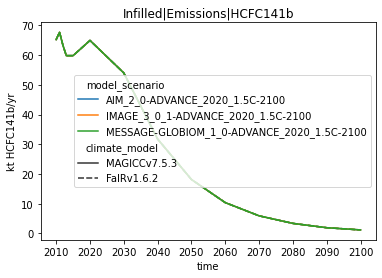

time                                                                                                                                                                              2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit           variable                                  
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC141b/yr Infilled|Emissions|HCFC141b   65.209531   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC141b/yr Infilled|Emissions|HCFC141b   65.209531   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC141b/yr Infilled|Emissions|HCFC141b   65.209531   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC141b/yr Infilled|Emissions|HCFC141b   65.209531   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC141b/yr Infilled|Emissions|HCFC141b   65.209531   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC141b/yr Infilled|Emissions|HCFC141b   65.209531   

time                                                                                                                                                                              2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit           variable                                  
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC141b/yr Infilled|Emissions|HCFC141b   67.690592   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC141b/yr Infilled|Emissions|HCFC141b   67.690592   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC141b/yr Infilled|Emissions|HCFC141b   67.690592   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC141b/yr Infilled|Emissions|HCFC141b   67.690592   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC141b/yr Infilled|Emissions|HCFC141b   67.690592   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC141b/yr Infilled|Emissions|HCFC141b   67.690592   

time                                                                                                                                                                              2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit           variable                                  
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC141b/yr Infilled|Emissions|HCFC141b   63.311547   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC141b/yr Infilled|Emissions|HCFC141b   63.311547   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC141b/yr Infilled|

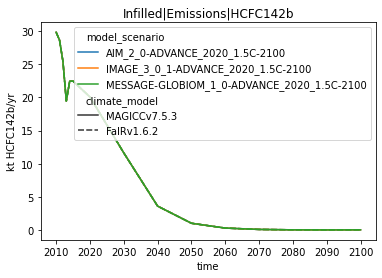

time                                                                                                                                                                              2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit           variable                                  
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC142b/yr Infilled|Emissions|HCFC142b   29.851794   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC142b/yr Infilled|Emissions|HCFC142b   29.851794   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC142b/yr Infilled|Emissions|HCFC142b   29.851794   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC142b/yr Infilled|Emissions|HCFC142b   29.851794   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC142b/yr Infilled|Emissions|HCFC142b   29.851794   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC142b/yr Infilled|Emissions|HCFC142b   29.851794   

time                                                                                                                                                                              2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit           variable                                  
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC142b/yr Infilled|Emissions|HCFC142b   28.645628   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC142b/yr Infilled|Emissions|HCFC142b   28.645628   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC142b/yr Infilled|Emissions|HCFC142b   28.645628   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC142b/yr Infilled|Emissions|HCFC142b   28.645628   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC142b/yr Infilled|Emissions|HCFC142b   28.645628   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC142b/yr Infilled|Emissions|HCFC142b   28.645628   

time                                                                                                                                                                              2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit           variable                                  
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC142b/yr Infilled|Emissions|HCFC142b   25.468261   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC142b/yr Infilled|Emissions|HCFC142b   25.468261   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC142b/yr Infilled|

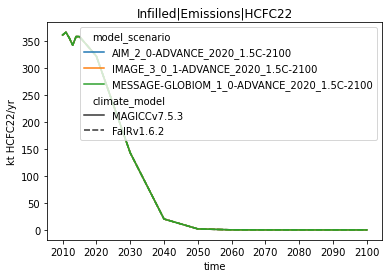

time                                                                                                                                                                          2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit         variable                                
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC22/yr Infilled|Emissions|HCFC22   361.74691   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC22/yr Infilled|Emissions|HCFC22   361.74691   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC22/yr Infilled|Emissions|HCFC22   361.74691   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC22/yr Infilled|Emissions|HCFC22   361.74691   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC22/yr Infilled|Emissions|HCFC22   361.74691   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC22/yr Infilled|Emissions|HCFC22   361.74691   

time                                                                                                                                                                          2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit         variable                                
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC22/yr Infilled|Emissions|HCFC22   366.94427   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC22/yr Infilled|Emissions|HCFC22   366.94427   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC22/yr Infilled|Emissions|HCFC22   366.94427   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC22/yr Infilled|Emissions|HCFC22   366.94427   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC22/yr Infilled|Emissions|HCFC22   366.94427   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC22/yr Infilled|Emissions|HCFC22   366.94427   

time                                                                                                                                                                          2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit         variable                                
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC22/yr Infilled|Emissions|HCFC22   356.29002   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC22/yr Infilled|Emissions|HCFC22   356.29002   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HCFC22/yr Infilled|Emissions|HCFC22   356.29002   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_

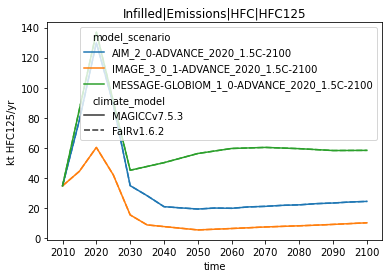

time                                                                                                                                                                              2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit         variable                                    
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC125/yr Infilled|Emissions|HFC|HFC125     34.5984   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC125/yr Infilled|Emissions|HFC|HFC125     34.5984   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC125/yr Infilled|Emissions|HFC|HFC125     34.5984   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC125/yr Infilled|Emissions|HFC|HFC125     34.5984   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC125/yr Infilled|Emissions|HFC|HFC125     34.5984   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC125/yr Infilled|Emissions|HFC|HFC125     34.5984   

time                                                                                                                                                                              2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit         variable                                    
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC125/yr Infilled|Emissions|HFC|HFC125    43.38964   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC125/yr Infilled|Emissions|HFC|HFC125    36.54516   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC125/yr Infilled|Emissions|HFC|HFC125    44.82999   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC125/yr Infilled|Emissions|HFC|HFC125    43.38964   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC125/yr Infilled|Emissions|HFC|HFC125    36.54516   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC125/yr Infilled|Emissions|HFC|HFC125    44.82999   

time                                                                                                                                                                              2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit         variable                                    
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC125/yr Infilled|Emissions|HFC|HFC125    52.18088   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC125/yr Infilled|Emissions|HFC|HFC125    38.49192   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC125/yr Infilled|Em

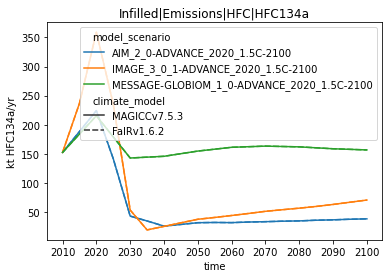

time                                                                                                                                                                                2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit          variable                                     
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC134a/yr Infilled|Emissions|HFC|HFC134a    152.5132   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC134a/yr Infilled|Emissions|HFC|HFC134a    152.5132   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC134a/yr Infilled|Emissions|HFC|HFC134a    152.5132   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC134a/yr Infilled|Emissions|HFC|HFC134a    152.5132   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC134a/yr Infilled|Emissions|HFC|HFC134a    152.5132   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC134a/yr Infilled|Emissions|HFC|HFC134a    152.5132   

time                                                                                                                                                                                2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit          variable                                     
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC134a/yr Infilled|Emissions|HFC|HFC134a   159.67296   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC134a/yr Infilled|Emissions|HFC|HFC134a   169.35872   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC134a/yr Infilled|Emissions|HFC|HFC134a   158.80580   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC134a/yr Infilled|Emissions|HFC|HFC134a   159.67296   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC134a/yr Infilled|Emissions|HFC|HFC134a   169.35872   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC134a/yr Infilled|Emissions|HFC|HFC134a   158.80580   

time                                                                                                                                                                                2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit          variable                                     
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC134a/yr Infilled|Emissions|HFC|HFC134a   166.83272   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC134a/yr Infilled|Emissions|HFC|HFC134a   186.20424   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE

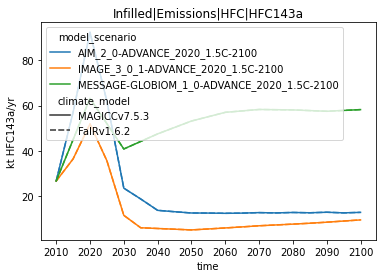

time                                                                                                                                                                                2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit          variable                                     
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC143a/yr Infilled|Emissions|HFC|HFC143a     26.5373   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC143a/yr Infilled|Emissions|HFC|HFC143a     26.5373   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC143a/yr Infilled|Emissions|HFC|HFC143a     26.5373   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC143a/yr Infilled|Emissions|HFC|HFC143a     26.5373   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC143a/yr Infilled|Emissions|HFC|HFC143a     26.5373   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC143a/yr Infilled|Emissions|HFC|HFC143a     26.5373   

time                                                                                                                                                                                2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit          variable                                     
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC143a/yr Infilled|Emissions|HFC|HFC143a    32.63292   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC143a/yr Infilled|Emissions|HFC|HFC143a    28.49776   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC143a/yr Infilled|Emissions|HFC|HFC143a    30.20353   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC143a/yr Infilled|Emissions|HFC|HFC143a    32.63292   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC143a/yr Infilled|Emissions|HFC|HFC143a    28.49776   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC143a/yr Infilled|Emissions|HFC|HFC143a    30.20353   

time                                                                                                                                                                                2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit          variable                                     
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC143a/yr Infilled|Emissions|HFC|HFC143a    38.72854   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC143a/yr Infilled|Emissions|HFC|HFC143a    30.45822   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE

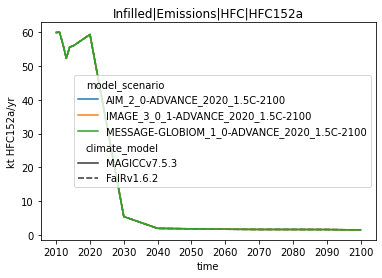

time                                                                                                                                                                                2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit          variable                                     
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC152a/yr Infilled|Emissions|HFC|HFC152a   59.879906   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC152a/yr Infilled|Emissions|HFC|HFC152a   59.879906   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC152a/yr Infilled|Emissions|HFC|HFC152a   59.879906   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC152a/yr Infilled|Emissions|HFC|HFC152a   59.879906   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC152a/yr Infilled|Emissions|HFC|HFC152a   59.879906   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC152a/yr Infilled|Emissions|HFC|HFC152a   59.879906   

time                                                                                                                                                                                2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit          variable                                     
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC152a/yr Infilled|Emissions|HFC|HFC152a   59.950898   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC152a/yr Infilled|Emissions|HFC|HFC152a   59.950898   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC152a/yr Infilled|Emissions|HFC|HFC152a   59.950898   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC152a/yr Infilled|Emissions|HFC|HFC152a   59.950898   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC152a/yr Infilled|Emissions|HFC|HFC152a   59.950898   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC152a/yr Infilled|Emissions|HFC|HFC152a   59.950898   

time                                                                                                                                                                                2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit          variable                                     
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC152a/yr Infilled|Emissions|HFC|HFC152a   56.430796   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC152a/yr Infilled|Emissions|HFC|HFC152a   56.430796   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE

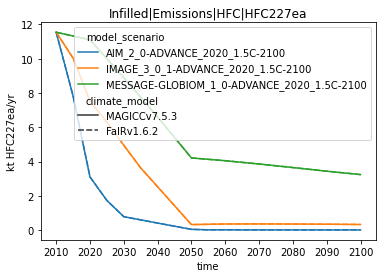

time                                                                                                                                                                                  2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit           variable                                      
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC227ea/yr Infilled|Emissions|HFC|HFC227ea     11.5413   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC227ea/yr Infilled|Emissions|HFC|HFC227ea     11.5413   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC227ea/yr Infilled|Emissions|HFC|HFC227ea     11.5413   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC227ea/yr Infilled|Emissions|HFC|HFC227ea     11.5413   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC227ea/yr Infilled|Emissions|HFC|HFC227ea     11.5413   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC227ea/yr Infilled|Emissions|HFC|HFC227ea     11.5413   

time                                                                                                                                                                                  2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit           variable                                      
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC227ea/yr Infilled|Emissions|HFC|HFC227ea    10.79848   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC227ea/yr Infilled|Emissions|HFC|HFC227ea    11.23982   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC227ea/yr Infilled|Emissions|HFC|HFC227ea    11.49739   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC227ea/yr Infilled|Emissions|HFC|HFC227ea    10.79848   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC227ea/yr Infilled|Emissions|HFC|HFC227ea    11.23982   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC227ea/yr Infilled|Emissions|HFC|HFC227ea    11.49739   

time                                                                                                                                                                                  2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit           variable                                      
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC227ea/yr Infilled|Emissions|HFC|HFC227ea    10.05566   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC227ea/yr Infilled|Emissions|HFC|HFC227ea    10.93834   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020

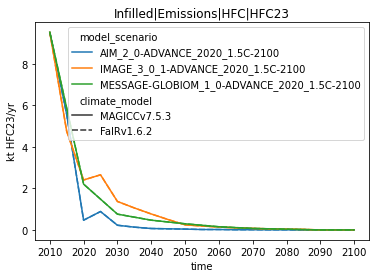

time                                                                                                                                                                            2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                                   
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC23/yr Infilled|Emissions|HFC|HFC23      9.5222   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC23/yr Infilled|Emissions|HFC|HFC23      9.5222   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC23/yr Infilled|Emissions|HFC|HFC23      9.5222   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC23/yr Infilled|Emissions|HFC|HFC23      9.5222   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC23/yr Infilled|Emissions|HFC|HFC23      9.5222   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC23/yr Infilled|Emissions|HFC|HFC23      9.5222   

time                                                                                                                                                                            2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                                   
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC23/yr Infilled|Emissions|HFC|HFC23     8.73066   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC23/yr Infilled|Emissions|HFC|HFC23     8.56776   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC23/yr Infilled|Emissions|HFC|HFC23     8.79049   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC23/yr Infilled|Emissions|HFC|HFC23     8.73066   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC23/yr Infilled|Emissions|HFC|HFC23     8.56776   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC23/yr Infilled|Emissions|HFC|HFC23     8.79049   

time                                                                                                                                                                            2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                                   
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC23/yr Infilled|Emissions|HFC|HFC23     7.93912   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC23/yr Infilled|Emissions|HFC|HFC23     7.61332   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC23/yr Infilled|Emissions|HFC|HFC23     8.05878   
MAGICCv7

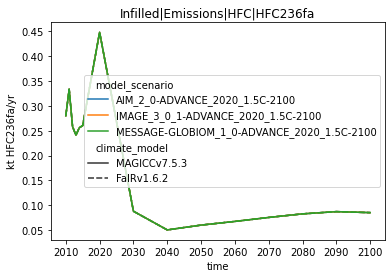

time                                                                                                                                                                                  2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit           variable                                      
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC236fa/yr Infilled|Emissions|HFC|HFC236fa    0.279934   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC236fa/yr Infilled|Emissions|HFC|HFC236fa    0.279934   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC236fa/yr Infilled|Emissions|HFC|HFC236fa    0.279934   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC236fa/yr Infilled|Emissions|HFC|HFC236fa    0.279934   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC236fa/yr Infilled|Emissions|HFC|HFC236fa    0.279934   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC236fa/yr Infilled|Emissions|HFC|HFC236fa    0.279934   

time                                                                                                                                                                                  2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit           variable                                      
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC236fa/yr Infilled|Emissions|HFC|HFC236fa    0.333569   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC236fa/yr Infilled|Emissions|HFC|HFC236fa    0.333569   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC236fa/yr Infilled|Emissions|HFC|HFC236fa    0.333569   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC236fa/yr Infilled|Emissions|HFC|HFC236fa    0.333569   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC236fa/yr Infilled|Emissions|HFC|HFC236fa    0.333569   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC236fa/yr Infilled|Emissions|HFC|HFC236fa    0.333569   

time                                                                                                                                                                                  2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit           variable                                      
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC236fa/yr Infilled|Emissions|HFC|HFC236fa    0.258313   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC236fa/yr Infilled|Emissions|HFC|HFC236fa    0.258313   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020

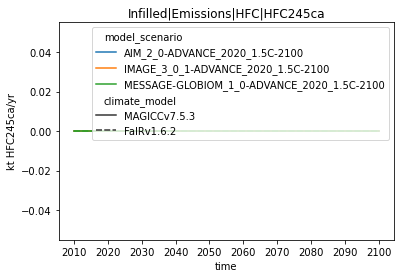

time                                                                                                                                                                                  2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit           variable                                      
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC245ca/yr Infilled|Emissions|HFC|HFC245ca         0.0   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC245ca/yr Infilled|Emissions|HFC|HFC245ca         0.0   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC245ca/yr Infilled|Emissions|HFC|HFC245ca         0.0   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC245ca/yr Infilled|Emissions|HFC|HFC245ca         0.0   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC245ca/yr Infilled|Emissions|HFC|HFC245ca         0.0   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC245ca/yr Infilled|Emissions|HFC|HFC245ca         0.0   

time                                                                                                                                                                                  2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit           variable                                      
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC245ca/yr Infilled|Emissions|HFC|HFC245ca         0.0   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC245ca/yr Infilled|Emissions|HFC|HFC245ca         0.0   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC245ca/yr Infilled|Emissions|HFC|HFC245ca         0.0   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC245ca/yr Infilled|Emissions|HFC|HFC245ca         0.0   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC245ca/yr Infilled|Emissions|HFC|HFC245ca         0.0   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC245ca/yr Infilled|Emissions|HFC|HFC245ca         0.0   

time                                                                                                                                                                                  2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit           variable                                      
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC245ca/yr Infilled|Emissions|HFC|HFC245ca         0.0   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC245ca/yr Infilled|Emissions|HFC|HFC245ca         0.0   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020

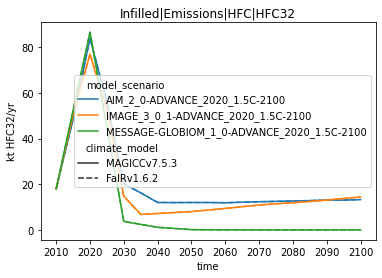

time                                                                                                                                                                            2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                                   
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC32/yr Infilled|Emissions|HFC|HFC32     17.9421   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC32/yr Infilled|Emissions|HFC|HFC32     17.9421   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC32/yr Infilled|Emissions|HFC|HFC32     17.9421   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC32/yr Infilled|Emissions|HFC|HFC32     17.9421   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC32/yr Infilled|Emissions|HFC|HFC32     17.9421   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC32/yr Infilled|Emissions|HFC|HFC32     17.9421   

time                                                                                                                                                                            2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                                   
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC32/yr Infilled|Emissions|HFC|HFC32    24.03942   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC32/yr Infilled|Emissions|HFC|HFC32    24.40244   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC32/yr Infilled|Emissions|HFC|HFC32    24.80590   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC32/yr Infilled|Emissions|HFC|HFC32    24.03942   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC32/yr Infilled|Emissions|HFC|HFC32    24.40244   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC32/yr Infilled|Emissions|HFC|HFC32    24.80590   

time                                                                                                                                                                            2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                                   
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC32/yr Infilled|Emissions|HFC|HFC32    30.13674   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC32/yr Infilled|Emissions|HFC|HFC32    30.86278   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC32/yr Infilled|Emissions|HFC|HFC32    31.66970   
MAGICCv7

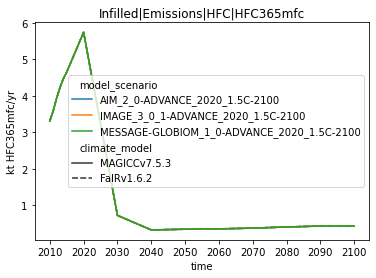

time                                                                                                                                                                                    2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit            variable                                       
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC365mfc/yr Infilled|Emissions|HFC|HFC365mfc      3.3098   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC365mfc/yr Infilled|Emissions|HFC|HFC365mfc      3.3098   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC365mfc/yr Infilled|Emissions|HFC|HFC365mfc      3.3098   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC365mfc/yr Infilled|Emissions|HFC|HFC365mfc      3.3098   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC365mfc/yr Infilled|Emissions|HFC|HFC365mfc      3.3098   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC365mfc/yr Infilled|Emissions|HFC|HFC365mfc      3.3098   

time                                                                                                                                                                                    2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit            variable                                       
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC365mfc/yr Infilled|Emissions|HFC|HFC365mfc      3.5841   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC365mfc/yr Infilled|Emissions|HFC|HFC365mfc      3.5841   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC365mfc/yr Infilled|Emissions|HFC|HFC365mfc      3.5841   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC365mfc/yr Infilled|Emissions|HFC|HFC365mfc      3.5841   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC365mfc/yr Infilled|Emissions|HFC|HFC365mfc      3.5841   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC365mfc/yr Infilled|Emissions|HFC|HFC365mfc      3.5841   

time                                                                                                                                                                                    2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit            variable                                       
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC365mfc/yr Infilled|Emissions|HFC|HFC365mfc      3.9269   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC365mfc/yr Infilled|Emissions|HFC|HFC365mfc      3.9269   
                          MESSAGE-GLOB

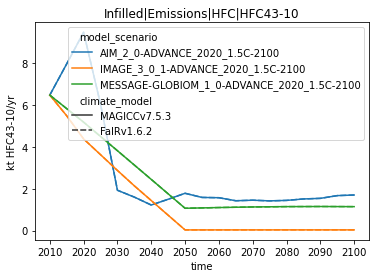

time                                                                                                                                                                                  2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit           variable                                      
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC43-10/yr Infilled|Emissions|HFC|HFC43-10      6.4867   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC43-10/yr Infilled|Emissions|HFC|HFC43-10      6.4867   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC43-10/yr Infilled|Emissions|HFC|HFC43-10      6.4867   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC43-10/yr Infilled|Emissions|HFC|HFC43-10      6.4867   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC43-10/yr Infilled|Emissions|HFC|HFC43-10      6.4867   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC43-10/yr Infilled|Emissions|HFC|HFC43-10      6.4867   

time                                                                                                                                                                                  2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit           variable                                      
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC43-10/yr Infilled|Emissions|HFC|HFC43-10     6.78582   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC43-10/yr Infilled|Emissions|HFC|HFC43-10     6.28852   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC43-10/yr Infilled|Emissions|HFC|HFC43-10     6.35703   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC43-10/yr Infilled|Emissions|HFC|HFC43-10     6.78582   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC43-10/yr Infilled|Emissions|HFC|HFC43-10     6.28852   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC43-10/yr Infilled|Emissions|HFC|HFC43-10     6.35703   

time                                                                                                                                                                                  2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit           variable                                      
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC43-10/yr Infilled|Emissions|HFC|HFC43-10     7.08494   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt HFC43-10/yr Infilled|Emissions|HFC|HFC43-10     6.09034   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020

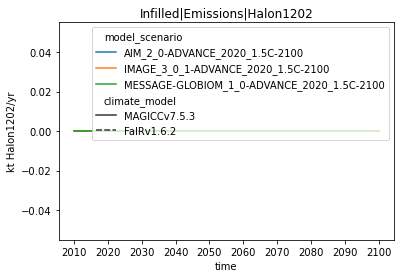

time                                                                                                                                                                                2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit            variable                                   
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1202/yr Infilled|Emissions|Halon1202         0.0   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1202/yr Infilled|Emissions|Halon1202         0.0   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1202/yr Infilled|Emissions|Halon1202         0.0   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1202/yr Infilled|Emissions|Halon1202         0.0   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1202/yr Infilled|Emissions|Halon1202         0.0   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1202/yr Infilled|Emissions|Halon1202         0.0   

time                                                                                                                                                                                2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit            variable                                   
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1202/yr Infilled|Emissions|Halon1202         0.0   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1202/yr Infilled|Emissions|Halon1202         0.0   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1202/yr Infilled|Emissions|Halon1202         0.0   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1202/yr Infilled|Emissions|Halon1202         0.0   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1202/yr Infilled|Emissions|Halon1202         0.0   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1202/yr Infilled|Emissions|Halon1202         0.0   

time                                                                                                                                                                                2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit            variable                                   
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1202/yr Infilled|Emissions|Halon1202         0.0   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1202/yr Infilled|Emissions|Halon1202         0.0   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE

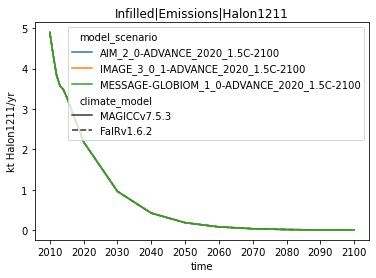

time                                                                                                                                                                                2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit            variable                                   
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1211/yr Infilled|Emissions|Halon1211    4.897555   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1211/yr Infilled|Emissions|Halon1211    4.897555   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1211/yr Infilled|Emissions|Halon1211    4.897555   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1211/yr Infilled|Emissions|Halon1211    4.897555   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1211/yr Infilled|Emissions|Halon1211    4.897555   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1211/yr Infilled|Emissions|Halon1211    4.897555   

time                                                                                                                                                                                2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit            variable                                   
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1211/yr Infilled|Emissions|Halon1211    4.336177   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1211/yr Infilled|Emissions|Halon1211    4.336177   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1211/yr Infilled|Emissions|Halon1211    4.336177   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1211/yr Infilled|Emissions|Halon1211    4.336177   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1211/yr Infilled|Emissions|Halon1211    4.336177   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1211/yr Infilled|Emissions|Halon1211    4.336177   

time                                                                                                                                                                                2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit            variable                                   
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1211/yr Infilled|Emissions|Halon1211    3.837981   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1211/yr Infilled|Emissions|Halon1211    3.837981   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE

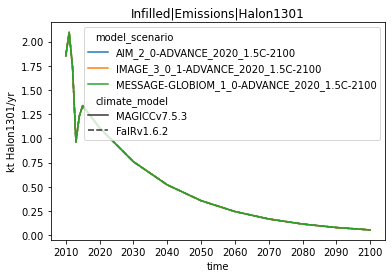

time                                                                                                                                                                                2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit            variable                                   
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1301/yr Infilled|Emissions|Halon1301    1.851166   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1301/yr Infilled|Emissions|Halon1301    1.851166   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1301/yr Infilled|Emissions|Halon1301    1.851166   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1301/yr Infilled|Emissions|Halon1301    1.851166   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1301/yr Infilled|Emissions|Halon1301    1.851166   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1301/yr Infilled|Emissions|Halon1301    1.851166   

time                                                                                                                                                                                2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit            variable                                   
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1301/yr Infilled|Emissions|Halon1301    2.096153   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1301/yr Infilled|Emissions|Halon1301    2.096153   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1301/yr Infilled|Emissions|Halon1301    2.096153   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1301/yr Infilled|Emissions|Halon1301    2.096153   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1301/yr Infilled|Emissions|Halon1301    2.096153   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1301/yr Infilled|Emissions|Halon1301    2.096153   

time                                                                                                                                                                                2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit            variable                                   
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1301/yr Infilled|Emissions|Halon1301    1.732872   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon1301/yr Infilled|Emissions|Halon1301    1.732872   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE

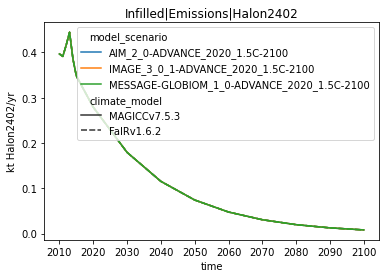

time                                                                                                                                                                                2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit            variable                                   
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon2402/yr Infilled|Emissions|Halon2402    0.396552   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon2402/yr Infilled|Emissions|Halon2402    0.396552   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon2402/yr Infilled|Emissions|Halon2402    0.396552   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon2402/yr Infilled|Emissions|Halon2402    0.396552   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon2402/yr Infilled|Emissions|Halon2402    0.396552   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon2402/yr Infilled|Emissions|Halon2402    0.396552   

time                                                                                                                                                                                2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit            variable                                   
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon2402/yr Infilled|Emissions|Halon2402    0.391059   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon2402/yr Infilled|Emissions|Halon2402    0.391059   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon2402/yr Infilled|Emissions|Halon2402    0.391059   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon2402/yr Infilled|Emissions|Halon2402    0.391059   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon2402/yr Infilled|Emissions|Halon2402    0.391059   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon2402/yr Infilled|Emissions|Halon2402    0.391059   

time                                                                                                                                                                                2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit            variable                                   
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon2402/yr Infilled|Emissions|Halon2402    0.415949   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt Halon2402/yr Infilled|Emissions|Halon2402    0.415949   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE

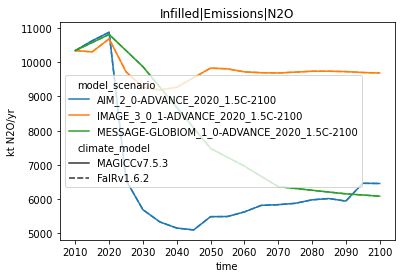

time                                                                                                                                                                      2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit      variable                               
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt N2O/yr Infilled|Emissions|N2O  10340.157143   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt N2O/yr Infilled|Emissions|N2O  10340.157143   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt N2O/yr Infilled|Emissions|N2O  10340.157143   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt N2O/yr Infilled|Emissions|N2O  10340.157143   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt N2O/yr Infilled|Emissions|N2O  10340.157143   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt N2O/yr Infilled|Emissions|N2O  10340.157143   

time                                                                                                                                                                      2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit      variable                               
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt N2O/yr Infilled|Emissions|N2O  10397.765714   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt N2O/yr Infilled|Emissions|N2O  10332.582857   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt N2O/yr Infilled|Emissions|N2O  10387.284286   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt N2O/yr Infilled|Emissions|N2O  10397.765714   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt N2O/yr Infilled|Emissions|N2O  10332.582857   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt N2O/yr Infilled|Emissions|N2O  10387.284286   

time                                                                                                                                                                      2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit      variable                               
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt N2O/yr Infilled|Emissions|N2O  10455.374286   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt N2O/yr Infilled|Emissions|N2O  10325.008571   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt N2O/yr Infilled|Emissions|N2O  10434.411429   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 

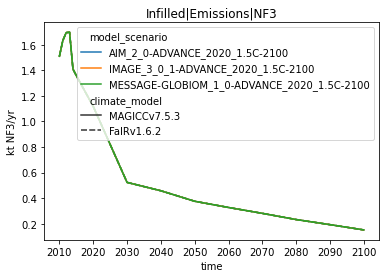

time                                                                                                                                                                    2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit      variable                             
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt NF3/yr Infilled|Emissions|NF3    1.509367   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt NF3/yr Infilled|Emissions|NF3    1.509367   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt NF3/yr Infilled|Emissions|NF3    1.509367   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt NF3/yr Infilled|Emissions|NF3    1.509367   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt NF3/yr Infilled|Emissions|NF3    1.509367   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt NF3/yr Infilled|Emissions|NF3    1.509367   

time                                                                                                                                                                    2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit      variable                             
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt NF3/yr Infilled|Emissions|NF3     1.63148   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt NF3/yr Infilled|Emissions|NF3     1.63148   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt NF3/yr Infilled|Emissions|NF3     1.63148   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt NF3/yr Infilled|Emissions|NF3     1.63148   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt NF3/yr Infilled|Emissions|NF3     1.63148   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt NF3/yr Infilled|Emissions|NF3     1.63148   

time                                                                                                                                                                    2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit      variable                             
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt NF3/yr Infilled|Emissions|NF3    1.694094   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt NF3/yr Infilled|Emissions|NF3    1.694094   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt NF3/yr Infilled|Emissions|NF3    1.694094   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt NF3/yr Infilled|Emissions|NF3    1.6940

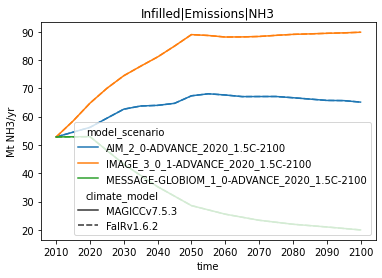

time                                                                                                                                                                    2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit      variable                             
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt NH3/yr Infilled|Emissions|NH3    52.83685   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt NH3/yr Infilled|Emissions|NH3    52.83685   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt NH3/yr Infilled|Emissions|NH3    52.83685   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt NH3/yr Infilled|Emissions|NH3    52.83685   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt NH3/yr Infilled|Emissions|NH3    52.83685   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt NH3/yr Infilled|Emissions|NH3    52.83685   

time                                                                                                                                                                    2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit      variable                             
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt NH3/yr Infilled|Emissions|NH3   53.173086   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt NH3/yr Infilled|Emissions|NH3   53.963197   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt NH3/yr Infilled|Emissions|NH3   52.846625   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt NH3/yr Infilled|Emissions|NH3   53.173086   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt NH3/yr Infilled|Emissions|NH3   53.963197   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt NH3/yr Infilled|Emissions|NH3   52.846625   

time                                                                                                                                                                    2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit      variable                             
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt NH3/yr Infilled|Emissions|NH3   53.509321   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt NH3/yr Infilled|Emissions|NH3   55.089544   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt NH3/yr Infilled|Emissions|NH3   52.856400   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt NH3/yr Infilled|Emissions|NH3   53.5093

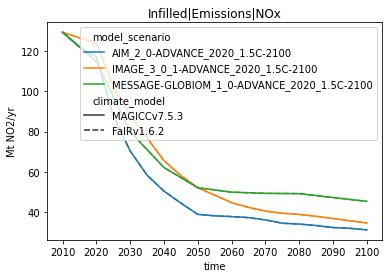

time                                                                                                                                                                    2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit      variable                             
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt NO2/yr Infilled|Emissions|NOx  129.368429   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt NO2/yr Infilled|Emissions|NOx  129.368429   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt NO2/yr Infilled|Emissions|NOx  129.368429   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt NO2/yr Infilled|Emissions|NOx  129.368429   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt NO2/yr Infilled|Emissions|NOx  129.368429   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt NO2/yr Infilled|Emissions|NOx  129.368429   

time                                                                                                                                                                    2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit      variable                             
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt NO2/yr Infilled|Emissions|NOx  127.923700   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt NO2/yr Infilled|Emissions|NOx  128.810054   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt NO2/yr Infilled|Emissions|NOx  127.901587   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt NO2/yr Infilled|Emissions|NOx  127.923700   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt NO2/yr Infilled|Emissions|NOx  128.810054   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt NO2/yr Infilled|Emissions|NOx  127.901587   

time                                                                                                                                                                    2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit      variable                             
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt NO2/yr Infilled|Emissions|NOx  126.478971   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt NO2/yr Infilled|Emissions|NOx  128.251680   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt NO2/yr Infilled|Emissions|NOx  126.434746   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt NO2/yr Infilled|Emissions|NOx  126.4789

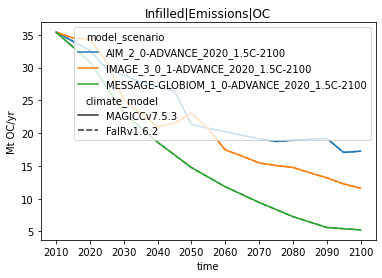

time                                                                                                                                                                  2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit     variable                            
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt OC/yr Infilled|Emissions|OC     35.3887   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt OC/yr Infilled|Emissions|OC     35.3887   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt OC/yr Infilled|Emissions|OC     35.3887   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt OC/yr Infilled|Emissions|OC     35.3887   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt OC/yr Infilled|Emissions|OC     35.3887   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt OC/yr Infilled|Emissions|OC     35.3887   

time                                                                                                                                                                  2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit     variable                            
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt OC/yr Infilled|Emissions|OC    35.11038   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt OC/yr Infilled|Emissions|OC    35.21564   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt OC/yr Infilled|Emissions|OC    34.93618   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt OC/yr Infilled|Emissions|OC    35.11038   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt OC/yr Infilled|Emissions|OC    35.21564   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt OC/yr Infilled|Emissions|OC    34.93618   

time                                                                                                                                                                  2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit     variable                            
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt OC/yr Infilled|Emissions|OC    34.83206   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt OC/yr Infilled|Emissions|OC    35.04258   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt OC/yr Infilled|Emissions|OC    34.48366   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt OC/yr Infilled|Emissions|OC    34.83206   
                          IMAGE_3_0_1 

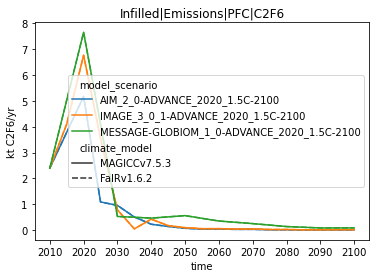

time                                                                                                                                                                          2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit       variable                                  
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt C2F6/yr Infilled|Emissions|PFC|C2F6      2.3992   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt C2F6/yr Infilled|Emissions|PFC|C2F6      2.3992   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt C2F6/yr Infilled|Emissions|PFC|C2F6      2.3992   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt C2F6/yr Infilled|Emissions|PFC|C2F6      2.3992   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt C2F6/yr Infilled|Emissions|PFC|C2F6      2.3992   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt C2F6/yr Infilled|Emissions|PFC|C2F6      2.3992   

time                                                                                                                                                                          2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit       variable                                  
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt C2F6/yr Infilled|Emissions|PFC|C2F6     2.67628   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt C2F6/yr Infilled|Emissions|PFC|C2F6     2.73938   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt C2F6/yr Infilled|Emissions|PFC|C2F6     2.92442   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt C2F6/yr Infilled|Emissions|PFC|C2F6     2.67628   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt C2F6/yr Infilled|Emissions|PFC|C2F6     2.73938   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt C2F6/yr Infilled|Emissions|PFC|C2F6     2.92442   

time                                                                                                                                                                          2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit       variable                                  
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt C2F6/yr Infilled|Emissions|PFC|C2F6     2.95336   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt C2F6/yr Infilled|Emissions|PFC|C2F6     3.07956   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt C2F6/yr Infilled|Emissions|PFC|C2F6     3.44964   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_

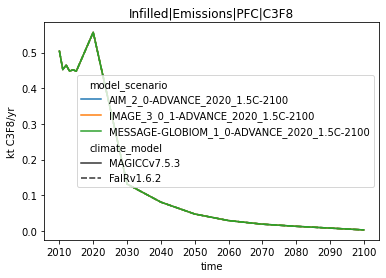

time                                                                                                                                                                          2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit       variable                                  
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt C3F8/yr Infilled|Emissions|PFC|C3F8    0.504032   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt C3F8/yr Infilled|Emissions|PFC|C3F8    0.504032   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt C3F8/yr Infilled|Emissions|PFC|C3F8    0.504032   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt C3F8/yr Infilled|Emissions|PFC|C3F8    0.504032   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt C3F8/yr Infilled|Emissions|PFC|C3F8    0.504032   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt C3F8/yr Infilled|Emissions|PFC|C3F8    0.504032   

time                                                                                                                                                                          2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit       variable                                  
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt C3F8/yr Infilled|Emissions|PFC|C3F8      0.4523   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt C3F8/yr Infilled|Emissions|PFC|C3F8      0.4523   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt C3F8/yr Infilled|Emissions|PFC|C3F8      0.4523   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt C3F8/yr Infilled|Emissions|PFC|C3F8      0.4523   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt C3F8/yr Infilled|Emissions|PFC|C3F8      0.4523   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt C3F8/yr Infilled|Emissions|PFC|C3F8      0.4523   

time                                                                                                                                                                          2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit       variable                                  
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt C3F8/yr Infilled|Emissions|PFC|C3F8    0.464845   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt C3F8/yr Infilled|Emissions|PFC|C3F8    0.464845   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt C3F8/yr Infilled|Emissions|PFC|C3F8    0.464845   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_

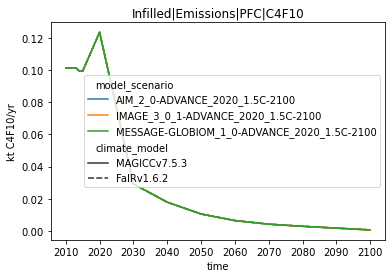

time                                                                                                                                                                            2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                                   
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt C4F10/yr Infilled|Emissions|PFC|C4F10     0.10137   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt C4F10/yr Infilled|Emissions|PFC|C4F10     0.10137   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt C4F10/yr Infilled|Emissions|PFC|C4F10     0.10137   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt C4F10/yr Infilled|Emissions|PFC|C4F10     0.10137   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt C4F10/yr Infilled|Emissions|PFC|C4F10     0.10137   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt C4F10/yr Infilled|Emissions|PFC|C4F10     0.10137   

time                                                                                                                                                                            2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                                   
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt C4F10/yr Infilled|Emissions|PFC|C4F10     0.10139   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt C4F10/yr Infilled|Emissions|PFC|C4F10     0.10139   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt C4F10/yr Infilled|Emissions|PFC|C4F10     0.10139   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt C4F10/yr Infilled|Emissions|PFC|C4F10     0.10139   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt C4F10/yr Infilled|Emissions|PFC|C4F10     0.10139   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt C4F10/yr Infilled|Emissions|PFC|C4F10     0.10139   

time                                                                                                                                                                            2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                                   
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt C4F10/yr Infilled|Emissions|PFC|C4F10     0.10141   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt C4F10/yr Infilled|Emissions|PFC|C4F10     0.10141   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt C4F10/yr Infilled|Emissions|PFC|C4F10     0.10141   
MAGICCv7

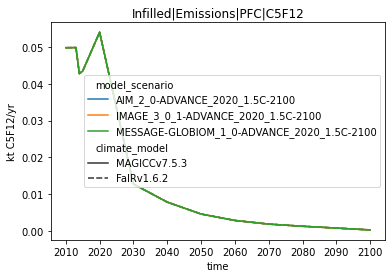

time                                                                                                                                                                            2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                                   
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt C5F12/yr Infilled|Emissions|PFC|C5F12    0.049853   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt C5F12/yr Infilled|Emissions|PFC|C5F12    0.049853   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt C5F12/yr Infilled|Emissions|PFC|C5F12    0.049853   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt C5F12/yr Infilled|Emissions|PFC|C5F12    0.049853   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt C5F12/yr Infilled|Emissions|PFC|C5F12    0.049853   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt C5F12/yr Infilled|Emissions|PFC|C5F12    0.049853   

time                                                                                                                                                                            2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                                   
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt C5F12/yr Infilled|Emissions|PFC|C5F12    0.049864   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt C5F12/yr Infilled|Emissions|PFC|C5F12    0.049864   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt C5F12/yr Infilled|Emissions|PFC|C5F12    0.049864   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt C5F12/yr Infilled|Emissions|PFC|C5F12    0.049864   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt C5F12/yr Infilled|Emissions|PFC|C5F12    0.049864   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt C5F12/yr Infilled|Emissions|PFC|C5F12    0.049864   

time                                                                                                                                                                            2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                                   
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt C5F12/yr Infilled|Emissions|PFC|C5F12    0.049876   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt C5F12/yr Infilled|Emissions|PFC|C5F12    0.049876   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt C5F12/yr Infilled|Emissions|PFC|C5F12    0.049876   
MAGICCv7

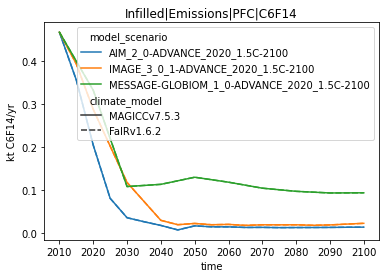

time                                                                                                                                                                            2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                                   
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt C6F14/yr Infilled|Emissions|PFC|C6F14      0.4666   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt C6F14/yr Infilled|Emissions|PFC|C6F14      0.4666   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt C6F14/yr Infilled|Emissions|PFC|C6F14      0.4666   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt C6F14/yr Infilled|Emissions|PFC|C6F14      0.4666   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt C6F14/yr Infilled|Emissions|PFC|C6F14      0.4666   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt C6F14/yr Infilled|Emissions|PFC|C6F14      0.4666   

time                                                                                                                                                                            2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                                   
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt C6F14/yr Infilled|Emissions|PFC|C6F14     0.44442   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt C6F14/yr Infilled|Emissions|PFC|C6F14     0.45188   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt C6F14/yr Infilled|Emissions|PFC|C6F14     0.45315   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt C6F14/yr Infilled|Emissions|PFC|C6F14     0.44442   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt C6F14/yr Infilled|Emissions|PFC|C6F14     0.45188   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt C6F14/yr Infilled|Emissions|PFC|C6F14     0.45315   

time                                                                                                                                                                            2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                                   
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt C6F14/yr Infilled|Emissions|PFC|C6F14     0.42224   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt C6F14/yr Infilled|Emissions|PFC|C6F14     0.43716   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt C6F14/yr Infilled|Emissions|PFC|C6F14     0.43970   
MAGICCv7

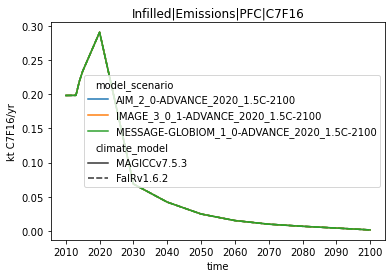

time                                                                                                                                                                            2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                                   
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt C7F16/yr Infilled|Emissions|PFC|C7F16    0.198162   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt C7F16/yr Infilled|Emissions|PFC|C7F16    0.198162   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt C7F16/yr Infilled|Emissions|PFC|C7F16    0.198162   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt C7F16/yr Infilled|Emissions|PFC|C7F16    0.198162   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt C7F16/yr Infilled|Emissions|PFC|C7F16    0.198162   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt C7F16/yr Infilled|Emissions|PFC|C7F16    0.198162   

time                                                                                                                                                                            2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                                   
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt C7F16/yr Infilled|Emissions|PFC|C7F16    0.198227   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt C7F16/yr Infilled|Emissions|PFC|C7F16    0.198227   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt C7F16/yr Infilled|Emissions|PFC|C7F16    0.198227   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt C7F16/yr Infilled|Emissions|PFC|C7F16    0.198227   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt C7F16/yr Infilled|Emissions|PFC|C7F16    0.198227   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt C7F16/yr Infilled|Emissions|PFC|C7F16    0.198227   

time                                                                                                                                                                            2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                                   
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt C7F16/yr Infilled|Emissions|PFC|C7F16    0.198293   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt C7F16/yr Infilled|Emissions|PFC|C7F16    0.198293   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt C7F16/yr Infilled|Emissions|PFC|C7F16    0.198293   
MAGICCv7

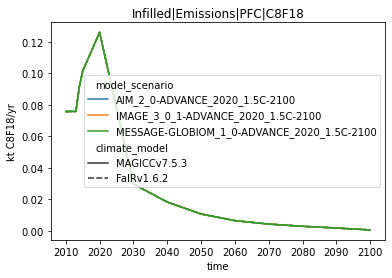

time                                                                                                                                                                            2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                                   
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt C8F18/yr Infilled|Emissions|PFC|C8F18    0.075768   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt C8F18/yr Infilled|Emissions|PFC|C8F18    0.075768   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt C8F18/yr Infilled|Emissions|PFC|C8F18    0.075768   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt C8F18/yr Infilled|Emissions|PFC|C8F18    0.075768   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt C8F18/yr Infilled|Emissions|PFC|C8F18    0.075768   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt C8F18/yr Infilled|Emissions|PFC|C8F18    0.075768   

time                                                                                                                                                                            2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                                   
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt C8F18/yr Infilled|Emissions|PFC|C8F18    0.075793   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt C8F18/yr Infilled|Emissions|PFC|C8F18    0.075793   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt C8F18/yr Infilled|Emissions|PFC|C8F18    0.075793   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt C8F18/yr Infilled|Emissions|PFC|C8F18    0.075793   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt C8F18/yr Infilled|Emissions|PFC|C8F18    0.075793   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt C8F18/yr Infilled|Emissions|PFC|C8F18    0.075793   

time                                                                                                                                                                            2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                                   
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt C8F18/yr Infilled|Emissions|PFC|C8F18    0.075818   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt C8F18/yr Infilled|Emissions|PFC|C8F18    0.075818   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt C8F18/yr Infilled|Emissions|PFC|C8F18    0.075818   
MAGICCv7

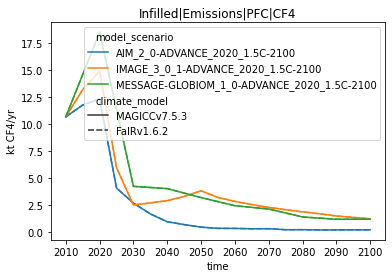

time                                                                                                                                                                        2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit      variable                                 
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CF4/yr Infilled|Emissions|PFC|CF4     10.6344   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CF4/yr Infilled|Emissions|PFC|CF4     10.6344   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CF4/yr Infilled|Emissions|PFC|CF4     10.6344   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CF4/yr Infilled|Emissions|PFC|CF4     10.6344   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CF4/yr Infilled|Emissions|PFC|CF4     10.6344   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CF4/yr Infilled|Emissions|PFC|CF4     10.6344   

time                                                                                                                                                                        2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit      variable                                 
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CF4/yr Infilled|Emissions|PFC|CF4    10.85280   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CF4/yr Infilled|Emissions|PFC|CF4    11.13768   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CF4/yr Infilled|Emissions|PFC|CF4    11.41741   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CF4/yr Infilled|Emissions|PFC|CF4    10.85280   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CF4/yr Infilled|Emissions|PFC|CF4    11.13768   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CF4/yr Infilled|Emissions|PFC|CF4    11.41741   

time                                                                                                                                                                        2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit      variable                                 
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt CF4/yr Infilled|Emissions|PFC|CF4    11.07120   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt CF4/yr Infilled|Emissions|PFC|CF4    11.64096   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt CF4/yr Infilled|Emissions|PFC|CF4    12.20042   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not

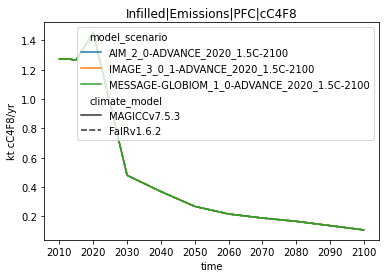

time                                                                                                                                                                            2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                                   
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt cC4F8/yr Infilled|Emissions|PFC|cC4F8     1.27214   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt cC4F8/yr Infilled|Emissions|PFC|cC4F8     1.27214   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt cC4F8/yr Infilled|Emissions|PFC|cC4F8     1.27214   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt cC4F8/yr Infilled|Emissions|PFC|cC4F8     1.27214   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt cC4F8/yr Infilled|Emissions|PFC|cC4F8     1.27214   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt cC4F8/yr Infilled|Emissions|PFC|cC4F8     1.27214   

time                                                                                                                                                                            2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                                   
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt cC4F8/yr Infilled|Emissions|PFC|cC4F8    1.272702   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt cC4F8/yr Infilled|Emissions|PFC|cC4F8    1.272702   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt cC4F8/yr Infilled|Emissions|PFC|cC4F8    1.272702   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt cC4F8/yr Infilled|Emissions|PFC|cC4F8    1.272702   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt cC4F8/yr Infilled|Emissions|PFC|cC4F8    1.272702   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt cC4F8/yr Infilled|Emissions|PFC|cC4F8    1.272702   

time                                                                                                                                                                            2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                                   
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt cC4F8/yr Infilled|Emissions|PFC|cC4F8    1.272928   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt cC4F8/yr Infilled|Emissions|PFC|cC4F8    1.272928   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt cC4F8/yr Infilled|Emissions|PFC|cC4F8    1.272928   
MAGICCv7

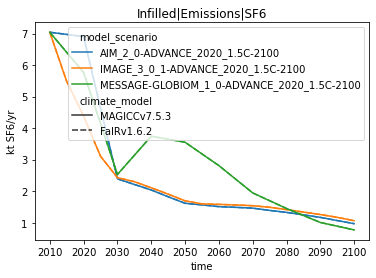

time                                                                                                                                                                    2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit      variable                             
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt SF6/yr Infilled|Emissions|SF6      7.0443   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt SF6/yr Infilled|Emissions|SF6      7.0443   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt SF6/yr Infilled|Emissions|SF6      7.0443   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt SF6/yr Infilled|Emissions|SF6      7.0443   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt SF6/yr Infilled|Emissions|SF6      7.0443   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt SF6/yr Infilled|Emissions|SF6      7.0443   

time                                                                                                                                                                    2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit      variable                             
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt SF6/yr Infilled|Emissions|SF6     7.03052   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt SF6/yr Infilled|Emissions|SF6     6.73204   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt SF6/yr Infilled|Emissions|SF6     6.91653   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt SF6/yr Infilled|Emissions|SF6     7.03052   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt SF6/yr Infilled|Emissions|SF6     6.73204   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt SF6/yr Infilled|Emissions|SF6     6.91653   

time                                                                                                                                                                    2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit      variable                             
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt SF6/yr Infilled|Emissions|SF6     7.01674   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt SF6/yr Infilled|Emissions|SF6     6.41978   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt SF6/yr Infilled|Emissions|SF6     6.78876   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt SF6/yr Infilled|Emissions|SF6     7.016

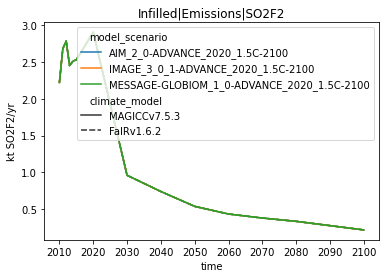

time                                                                                                                                                                        2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                               
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt SO2F2/yr Infilled|Emissions|SO2F2    2.223103   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt SO2F2/yr Infilled|Emissions|SO2F2    2.223103   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt SO2F2/yr Infilled|Emissions|SO2F2    2.223103   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt SO2F2/yr Infilled|Emissions|SO2F2    2.223103   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt SO2F2/yr Infilled|Emissions|SO2F2    2.223103   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt SO2F2/yr Infilled|Emissions|SO2F2    2.223103   

time                                                                                                                                                                        2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                               
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt SO2F2/yr Infilled|Emissions|SO2F2    2.682317   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt SO2F2/yr Infilled|Emissions|SO2F2    2.682317   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt SO2F2/yr Infilled|Emissions|SO2F2    2.682317   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt SO2F2/yr Infilled|Emissions|SO2F2    2.682317   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt SO2F2/yr Infilled|Emissions|SO2F2    2.682317   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt SO2F2/yr Infilled|Emissions|SO2F2    2.682317   

time                                                                                                                                                                        2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit        variable                               
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 kt SO2F2/yr Infilled|Emissions|SO2F2    2.786474   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 kt SO2F2/yr Infilled|Emissions|SO2F2    2.786474   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 kt SO2F2/yr Infilled|Emissions|SO2F2    2.786474   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not

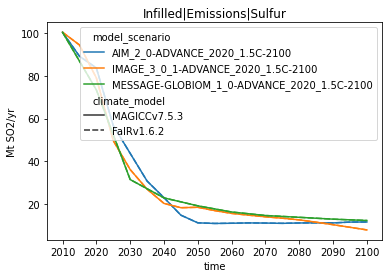

time                                                                                                                                                                       2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit      variable                                
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt SO2/yr Infilled|Emissions|Sulfur    100.4414   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt SO2/yr Infilled|Emissions|Sulfur    100.4414   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt SO2/yr Infilled|Emissions|Sulfur    100.4414   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt SO2/yr Infilled|Emissions|Sulfur    100.4414   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt SO2/yr Infilled|Emissions|Sulfur    100.4414   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt SO2/yr Infilled|Emissions|Sulfur    100.4414   

time                                                                                                                                                                       2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit      variable                                
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt SO2/yr Infilled|Emissions|Sulfur    98.19756   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt SO2/yr Infilled|Emissions|Sulfur    99.25096   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt SO2/yr Infilled|Emissions|Sulfur    97.74284   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt SO2/yr Infilled|Emissions|Sulfur    98.19756   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt SO2/yr Infilled|Emissions|Sulfur    99.25096   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt SO2/yr Infilled|Emissions|Sulfur    97.74284   

time                                                                                                                                                                       2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit      variable                                
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt SO2/yr Infilled|Emissions|Sulfur    95.95372   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt SO2/yr Infilled|Emissions|Sulfur    98.06052   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt SO2/yr Infilled|Emissions|Sulfur    95.04428   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  AD

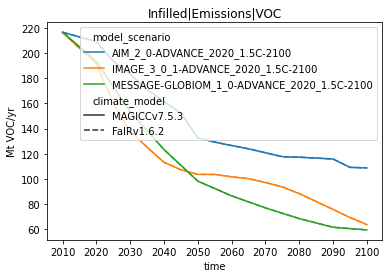

time                                                                                                                                                                    2010-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit      variable                             
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt VOC/yr Infilled|Emissions|VOC    216.4157   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt VOC/yr Infilled|Emissions|VOC    216.4157   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt VOC/yr Infilled|Emissions|VOC    216.4157   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt VOC/yr Infilled|Emissions|VOC    216.4157   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt VOC/yr Infilled|Emissions|VOC    216.4157   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt VOC/yr Infilled|Emissions|VOC    216.4157   

time                                                                                                                                                                    2011-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit      variable                             
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt VOC/yr Infilled|Emissions|VOC   215.67238   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt VOC/yr Infilled|Emissions|VOC   213.88210   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt VOC/yr Infilled|Emissions|VOC   214.09857   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt VOC/yr Infilled|Emissions|VOC   215.67238   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt VOC/yr Infilled|Emissions|VOC   213.88210   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt VOC/yr Infilled|Emissions|VOC   214.09857   

time                                                                                                                                                                    2012-01-01  \
climate_model methodology model               model_scenario                             percentile     region scenario               unit      variable                             
FaIRv1.6.2    SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt VOC/yr Infilled|Emissions|VOC   214.92906   
                          IMAGE_3_0_1         IMAGE_3_0_1-ADVANCE_2020_1.5C-2100         not_applicable World  ADVANCE_2020_1.5C-2100 Mt VOC/yr Infilled|Emissions|VOC   211.34850   
                          MESSAGE-GLOBIOM_1_0 MESSAGE-GLOBIOM_1_0-ADVANCE_2020_1.5C-2100 not_applicable World  ADVANCE_2020_1.5C-2100 Mt VOC/yr Infilled|Emissions|VOC   211.78144   
MAGICCv7.5.3  SR1.5       AIM_2_0             AIM_2_0-ADVANCE_2020_1.5C-2100             not_applicable World  ADVANCE_2020_1.5C-2100 Mt VOC/yr Infilled|Emissions|VOC   214.929

<IPython.core.display.Javascript object>

In [10]:
# for variable in [
#     "*NH3"
# ]:  #
for variable in tqdman.tqdm(
    sorted(
        emissions.filter(variable="*Infilled*")
        .filter(variable="*Kyoto*", keep=False)
        .get_unique_meta("variable")
    )
):
    pdf = emissions.filter(variable=variable).append(
        emissions_fair.filter(variable=variable)
    )
    pdf = pdf.filter(
        model_scenario=pdf.filter(climate_model="FaIR*").get_unique_meta(
            "model_scenario"
        )[:3]
    )

    to_drop = ["climate_model"]
    scmdata.testing.assert_scmdf_almost_equal(
        emissions.filter(variable=variable).drop_meta(to_drop),
        emissions_fair.filter(variable=variable).drop_meta(to_drop),
        allow_unordered=True,
        check_ts_names=False,
    )

    ax = pdf.lineplot(hue="model_scenario", style="climate_model")
    #         ax = pdf.lineplot(hue="variable", style="climate_model")
    ax.set_title(variable)
    plt.show()
    display(pdf.filter(year=range(2010, 2020 + 1)).timeseries().sort_index())
#     break